<a href="https://colab.research.google.com/github/pranavgupta001/Stock-Price-Prediction/blob/master/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 89kB/s 
     |████████████████████████████████| 491kB 46.6MB/s 
     |████████████████████████████████| 3.2MB 43.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.notebook import tqdm_notebook
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.layers import LSTM
import keras.backend as K
from sklearn.metrics import mean_squared_error
#from keras.layers import Dense,Dropout
#from keras.layers import LSTM
#from keras import optimizers
import tensorflow



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


In [3]:
from google.colab import files
upload=  files.upload()

Saving ge.us.txt to ge.us.txt


In [0]:
import io
df = pd.read_csv(io.BytesIO(upload['ge.us.txt']))

In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787,0
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851,0
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190,0
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779,0
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474,0


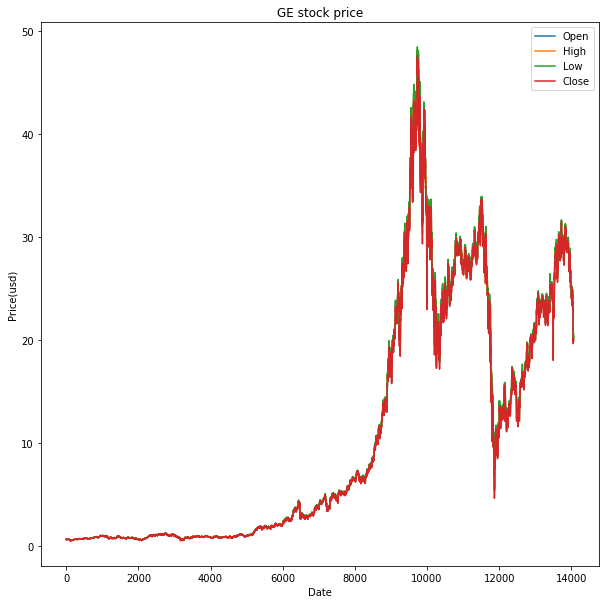

In [6]:
plt.figure(figsize=(10,10))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.title('GE stock price')
plt.xlabel('Date')
plt.ylabel('Price(usd)')
plt.legend(['Open','High','Low','Close'])
plt.show()

Text(0, 0.5, 'Volume')

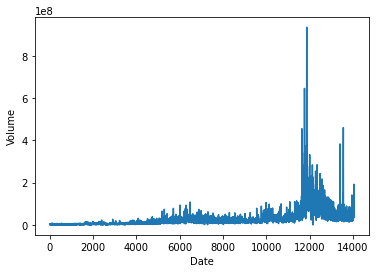

In [7]:
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')


In [8]:
df.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [0]:
df_fortrain=df[["Open","Close","High","Low","Volume"]]

In [0]:
df_train,df_test= train_test_split(df_fortrain,train_size=0.8,test_size=0.2,shuffle=False)


In [0]:
min_max_scaler =MinMaxScaler()
x_train = min_max_scaler.fit_transform(df_train)
x_test = min_max_scaler.fit_transform(df_test)


In [12]:
pd.DataFrame(x_train,index=x_train[:,0])

,0,1,2,3,4
0.003567,0.003567,0.003384,0.003528,0.003584,0.021083
0.003406,0.003406,0.003384,0.003192,0.003416,0.013655
0.003406,0.003406,0.003218,0.003192,0.003236,0.017587
0.003239,0.003239,0.002872,0.003028,0.002729,0.027309
0.002890,0.002890,0.002872,0.002684,0.002555,0.031351
...,...,...,...,...,...
0.566903,0.566903,0.564636,0.561449,0.568521,0.209744
0.566586,0.566586,0.566128,0.563178,0.568161,0.335852
0.567390,0.567390,0.565645,0.561449,0.569009,0.160414
0.566586,0.566586,0.572704,0.567825,0.566952,0.242176


In [0]:
def build_timeseries(mat,y_col_index):
  dim_0 =mat.shape[0]-Time_Steps
  dim_1 = mat.shape[1]
  x = np.zeros((dim_0,Time_Steps,dim_1))
  y = np.zeros((dim_0))

  for i in tqdm_notebook(range(dim_0)):
    x[i] = mat[i:Time_Steps+i]
    y[i] = mat[Time_Steps+i,y_col_index]
  print("lengthof time_series i/o",x.shape,y.shape)

  return x,y
  

In [0]:
def trim_dataset(mat,batch_size):
  no_of_rows_drop =mat.shape[0]%batch_size
  if(no_of_rows_drop>0):
    return mat[:-no_of_rows_drop]
  else:
    return mat
    


In [0]:
params = {"batch_size":20,"epochs":300,"lr":0.00010000,"time_steps":60}
Time_Steps= params["time_steps"]
Batch_Size  =params["batch_size"]
tqdm_notebook.pandas('Processing')

In [16]:
x_t,y_t = build_timeseries(x_train,3)
x_t = trim_dataset(x_t,Batch_Size)
y_t = trim_dataset(y_t,Batch_Size)
x_test,y_test = build_timeseries(x_test,3)



lengthof time_series i/o (11186, 60, 5) (11186,)



lengthof time_series i/o (2752, 60, 5) (2752,)


In [17]:
print("Batch trimmed size",x_t.shape,y_t.shape)

Batch trimmed size (11180, 60, 5) (11180,)


In [0]:
def create_model():
  lstm_model = Sequential()
  lstm_model.add(LSTM(100,batch_input_shape=(Batch_Size,Time_Steps,x_t.shape[2]),dropout=0.0,recurrent_dropout=0.0,stateful=True,return_sequences=True,kernel_initializer='random_uniform'))
  lstm_model.add(Dropout(0.4))
  lstm_model.add(LSTM(60,dropout=0.0))
  lstm_model.add(Dropout(0.4))
  lstm_model.add(Dense(20,activation='relu'))
  lstm_model.add(Dense(1,activation='sigmoid'))
  #optimizer = optimizer.RMSprop(lr=prams["lr"])
  lstm_model.compile(loss='mean_squared_error',optimizer='rmsprop')
  return lstm_model



In [19]:
model = create_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.fit(x_t,y_t,epochs =100,batch_size=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
11180/11180 [==============================] - 59s 5ms/sample - loss: 0.0030
Epoch 2/100
11180/11180 [==============================] - 58s 5ms/sample - loss: 5.9293e-04
Epoch 3/100
11180/11180 [==============================] - 58s 5ms/sample - loss: 4.7359e-04
Epoch 4/100
11180/11180 [==============================] - 59s 5ms/sample - loss: 4.1867e-04
Epoch 5/100
11180/11180 [==============================] - 59s 5ms/sample - loss: 3.6625e-04
Epoch 6/100
11180/11180 [==============================] - 59s 5ms/sample - loss: 3.5158e-04
Epoch 7/100
11180/11180 [==============================] - 58s 5ms/sample - loss: 3.1534e-04
Epoch 8/100
11180/11180 [==============================] - 58s 5ms/sample - loss: 3.0772e-04
Epoch 9/100
11180/11180 [==============================] - 58s 5ms/sample - loss: 3.0540e-04
Epoch 10/100
11180/11180 [==============================] - 58s 5ms/sampl

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model=load_model('/content/drive/My Drive/my_model.h')

In [22]:
y_pred = model.predict(trim_dataset(x_test,Batch_Size),batch_size=Batch_Size)  
y_pred.shape

(2740, 1)

In [23]:
y_test =trim_dataset(y_test,Batch_Size)
error = mean_squared_error(y_test,y_pred)
print("error is",error)


error is 0.002479768735686794


In [24]:
y_pred_org = (y_pred*min_max_scaler.data_range_[3])+min_max_scaler.data_min_[3]

y_test_t_org = (y_test*min_max_scaler.data_range_[3])+min_max_scaler.data_min_[3]
print(y_pred_org[0:15])
print(y_test_t_org[0:15])


[[25.877394]
 [25.904617]
 [25.894909]
 [25.89793 ]
 [26.164558]
 [26.202868]
 [26.559055]
 [27.413282]
 [28.115456]
 [28.284508]
 [28.458048]
 [28.36809 ]
 [28.19331 ]
 [28.11065 ]
 [28.239218]]
[28.25  28.178 28.22  28.234 28.5   28.468 29.154 30.116 30.392 30.602
 30.296 30.201 30.134 30.247 30.15 ]


In [0]:
model.save('/content/drive/My Drive/my_model.h')

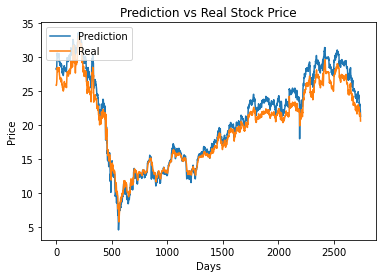

In [26]:
plt.plot(y_test_t_org)
plt.plot(y_pred_org)
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Prediction vs Real Stock Price')
plt.legend(['Prediction','Real'],loc='upper left')

